# Explore here

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

archivo= "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

df_original = pd.read_csv(archivo, sep=";")
df = pd.read_csv(archivo, sep=";")


datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Contamos con {num_duplicados} datos duplicados")
print()

df_duplicados = df[duplicados]

df_sin_duplicados = df.drop_duplicates()

df=df_sin_duplicados

# Obtener información sobre tipos de datos y valores no nulos
df.info()




Contamos con 41188 cantidad de datos y 21 atributos.

Contamos con 12 datos duplicados

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float6

- Contamos con 41.188 datos de clientes y 21 atributos.
- 12 datos de clientes están duplicados. Al eliminarlos resulta un total de 41.176.
- Ninguno de los atributos posee valores nulos.
- 10 características son numéricas y 11 características son categóricas. En esta última se encuentra nuestra variable a predecir.

### Selección de atributos relevantes:

Los siguientes atributos no aportan información a nuestra variable a predecir:
- contact
- month
- day_of_week

In [21]:
df.drop(["contact", "month", "day_of_week"], axis = 1, inplace = True)

df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Análisis univariante

Variables Categóricas: job, marital, education, default, housing, loan, poutcome, y.

In [22]:
df.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [23]:
df.marital.value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [24]:
df.education.value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [25]:
df.default.value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [26]:
df.housing.value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

In [27]:
df.loan.value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [28]:
df.poutcome.value_counts()

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

In [29]:
df.y.value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [30]:
df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


/tmp/ipykernel_705/1332422225.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
/tmp/ipykernel_705/1332422225.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2, 0].set_xticklabels(axis[2, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)


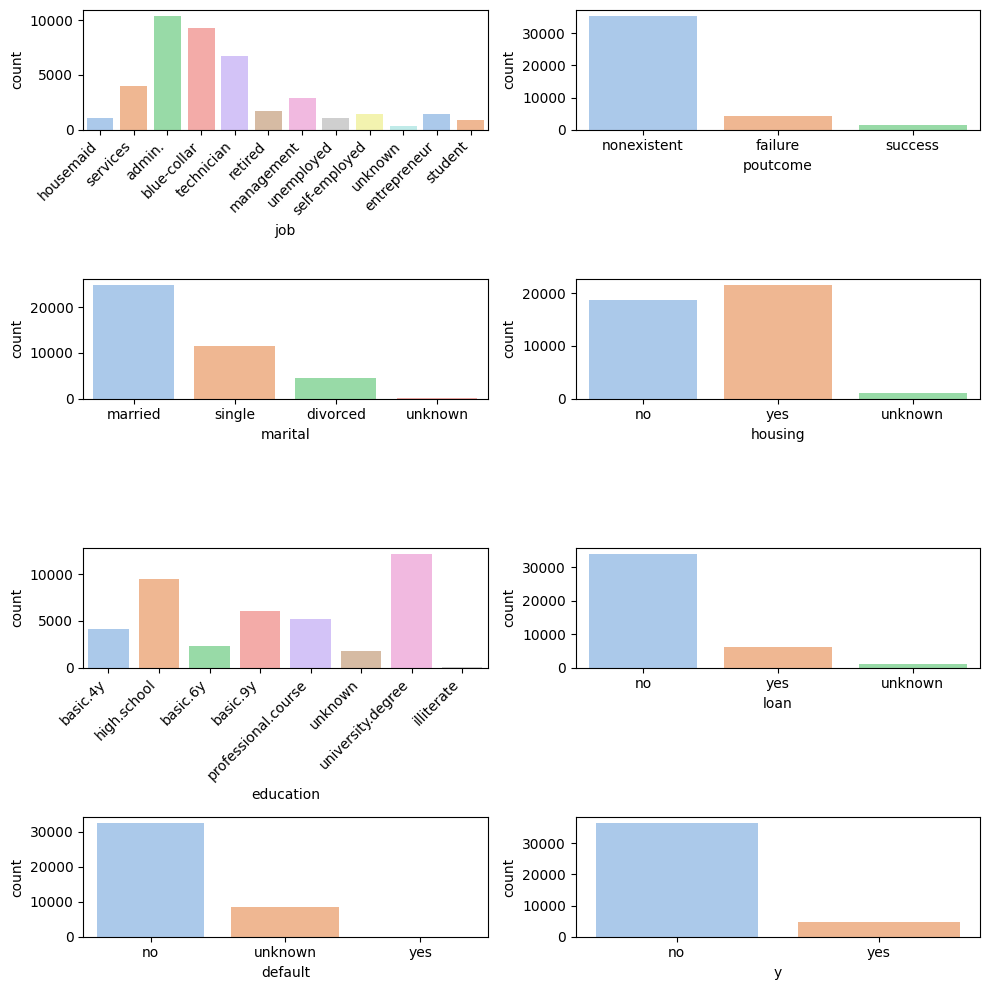

In [31]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10))

sns.countplot(ax = axis[0,0], data = df, x = "job", palette='pastel', hue= "job", legend=False)
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[1,0], data = df, x = "marital", palette='pastel', hue= "marital", legend=False)
sns.countplot(ax = axis[2,0], data = df, x = "education", palette='pastel', hue= "education", legend=False)
axis[2, 0].set_xticklabels(axis[2, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[3,0], data = df, x = "default", palette='pastel', hue= "default", legend=False)
sns.countplot(ax = axis[0,1], data = df, x = "poutcome", palette='pastel', hue= "poutcome", legend=False)
sns.countplot(ax = axis[1,1], data = df, x = "housing", palette='pastel', hue= "housing", legend=False)
sns.countplot(ax = axis[2,1], data = df, x = "loan", palette='pastel', hue= "loan", legend=False)
sns.countplot(ax = axis[3,1], data = df, x = "y", palette='pastel', hue= "y", legend=False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Los empleos de los clientes rondan mayoritariamente en administrativo, obrero y técnico.
- Podemos observar que la variable "poutcome" la mayoría de las variables son inexistentes. Vamos a eliminar este dato dado a que no aportará información en nuestra predicción.
- La mayoría de los clientes están casados.
- Es equilibrado los clientes que poseen préstamos de viviendas y los que no.
- Los clientes mayoritariamente tienen estudios universitarios, secundarios y básicos.
- La mayoría de los clientes no poseen un crédito actualmente.
- La mayoría de los clientes no contratará un depósito a largo plazo.


In [32]:
# Eliminamos la variable "poutcome":
df.drop(["poutcome"], axis = 1, inplace = True)

# En la variable educación reemplazamos 'basic.4y', 'basic.6y', 'basic.9y' por 'basic'
df['education'] = df['education'].replace({'basic.4y': 'basic', 'basic.6y': 'basic', 'basic.9y': 'basic'})
df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
